<a href="https://colab.research.google.com/github/TerryTian21/PyTorch-Practice/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

In [76]:
## Collect Data

import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()

In [77]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [79]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["targets"] = data.target

In [80]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Let's first practice with binary classification. We will only use targets that are 0 or 1 and let's only consider the sepal length and petal length.

In [81]:
train_df = df[["sepal length (cm)", "petal length (cm)", "targets"]].loc[df["targets"].isin([0,1])]

In [82]:
train_df.head(5)

,sepal length (cm),petal length (cm),targets
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [83]:
train_df.describe()

,sepal length (cm),petal length (cm),targets
count,100.000000,100.000000,100.000000
mean,5.471000,2.861000,0.500000
std,0.641698,1.449549,0.502519
min,4.300000,1.000000,0.000000
25%,5.000000,1.500000,0.000000
50%,5.400000,2.450000,0.500000
75%,5.900000,4.325000,1.000000
max,7.000000,5.100000,1.000000


In [84]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

From the following scatter, we should be able to linearlly separate this data relatively easily

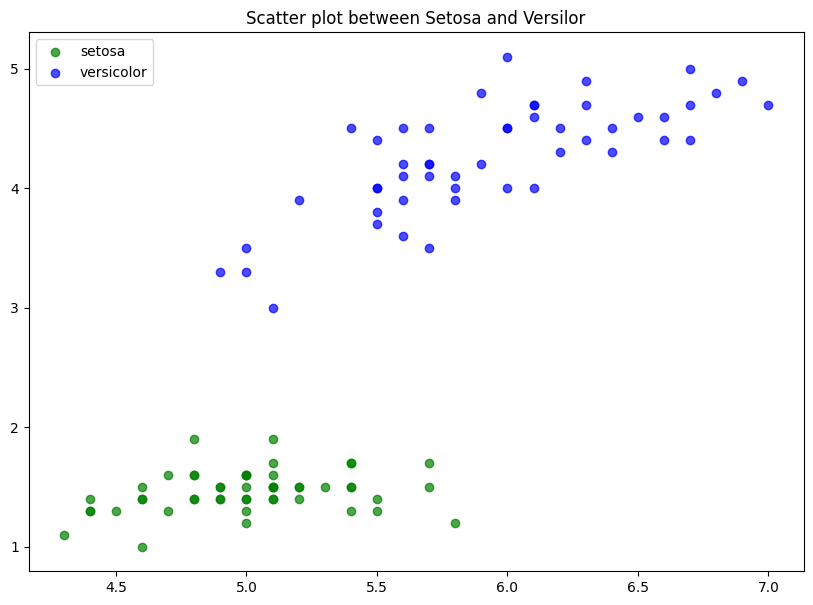

In [85]:
# Lets plot this dataset

import matplotlib.pyplot as plt

setosa = train_df[train_df["targets"].isin([0])]
versicolor = train_df[train_df["targets"].isin([1])]


plt.figure(figsize=(10,7))
plt.scatter(setosa["sepal length (cm)"], setosa["petal length (cm)"], color="g", alpha=0.7, label="setosa")
plt.scatter(versicolor["sepal length (cm)"], versicolor["petal length (cm)"], color="b", alpha=0.7, label="versicolor")
plt.title("Scatter plot between Setosa and Versilor")
plt.legend()

## Create our own SVM

In [86]:
train_df.columns

Index(['sepal length (cm)', 'petal length (cm)', 'targets'], dtype='object')

In [87]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Set up the X and y and make sure the shapes are matching

targets = train_df["targets"]
y = []
for target in targets:
  if target == 0:
    y.append(-1)
  else:
    y.append(1)

print(len(y))


100


In [88]:
X = train_df[['sepal length (cm)', 'petal length (cm)']].to_numpy()
print(len(X))
print(X[0])

100
[5.1 1.4]


In [89]:
# Get the train and test datasets
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [90]:
y_train = y_train.reshape(85,1)
y_test = y_test.reshape(15, 1)

Here we will create the training loop
- Instantiate the weights
- Calculate kernel
- Update weights based on value of kernel

We are going to randomly initialize the weights then get the average weight of 5 training runs to reduce variance and bias

In [97]:
from tqdm.auto import tqdm

repeats = 5

# Get the features from X
train_f1 = X_train[:, 0].reshape(85, 1)
train_f2 = X_train[:, 1].reshape(85, 1)
alpha = 0.0001

weights_1 = []
weights_2 = []

for repeat in range(repeats):
  # Instantiated the weights
  w1 = np.random.randn(85, 1)
  w2 = np.random.randn(85, 1)


  for epoch in tqdm(range(1, 10000), desc=f"Training Repeat {repeat + 1}"):
    out = w1 * train_f1 + w2 * train_f2
    kernel = out * y_train

    for i, val in enumerate(kernel):
      if val >= 1:
        w1 = w1 - alpha * (2 * (1 / epoch) * w1)
        w2 = w2 - alpha * (2 * (1/epoch) * w2)
      else:
        w1 = w1 + alpha * (y_train[i] * train_f1[i] - (2 * (1 / epoch) * w1))
        w2 = w2 + alpha * (y_train[i] * train_f2[i] - (2 * (1/epoch) * w2))

  weights_1.append(w1)
  weights_2.append(w2)


Training Repeat 1:   0%|          | 0/9999 [00:00<?, ?it/s]

Training Repeat 2:   0%|          | 0/9999 [00:00<?, ?it/s]

Training Repeat 3:   0%|          | 0/9999 [00:00<?, ?it/s]

Training Repeat 4:   0%|          | 0/9999 [00:00<?, ?it/s]

Training Repeat 5:   0%|          | 0/9999 [00:00<?, ?it/s]

In [99]:
weights_1 = np.array(weights_1)
weights_2 = np.array(weights_2)

w1 = np.mean(weights_1, axis=0)
w2 = np.mean(weights_2, axis=0)

Let's select a subset of the weights since the test dataset only contains 15 data points. We will repeat the process 5 times and average out the scores


In [101]:
# Clip the weights to suit the dataset
from sklearn.metrics import accuracy_score

w1_test = w1[: 15].reshape(15, 1)
w2_test = w2[: 15].reshape(15, 1)

# Extract the test data features
test_f1 = X_test[:, 0].reshape(15, 1)
test_f2 = X_test[:, 1].reshape(15, 1)

# Make Predictions
y_preds = w1_test * test_f1 + w2_test * test_f2
predictions = []
for item in y_preds:
  if item > 1:
    predictions.append(1)
  else:
    predictions.append(-1)

print(accuracy_score(y_test, predictions))

1.0


## Using SkLearn Modules

Practical Use Tips

1. **Avoiding Data Copy** : If data is not C order continuous then it will be copied before calling the C implementation

2. **Kernel Cache Size** : The size ofthe kernel cache has strong correlation to run time. For larger datasets it is recommended to use 500  (mb)

3. **Settin C** : C is set to 1 by default which controls the regularization. In a noisy dataset, decreasing C will add more regularization.

4. **Scaling Data** : SVM's are not scale invariant so it is recommended to scale data. For example it would be a good idea to normalize feature valuves between $[0,1]$

In [105]:
y = np.array(y).reshape(100, 1)
print(X.shape, y.shape)

(100, 2) (100, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


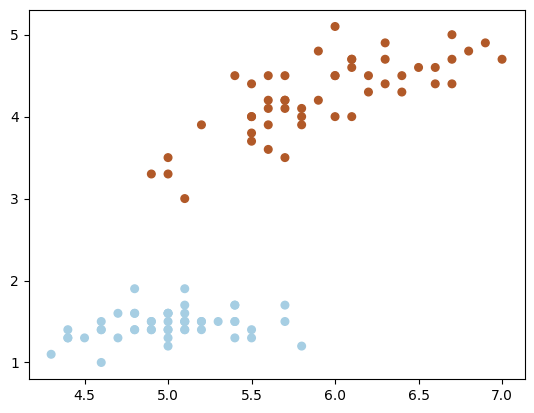

In [106]:
# Here we will demonstate a cool implementation of SVM where you can visualize the decision boundaries
from sklearn import svm

# Let's fit the model and and don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)


Notice that when we plot the support vectors they lie on plus/minus 1 of the decision boundary.

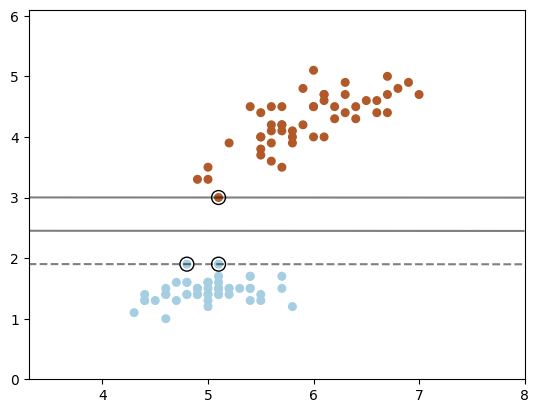

In [109]:
from sklearn.inspection import DecisionBoundaryDisplay


plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    plot_method="contour",
    ax=ax
)

# Plot the support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()


Note that while not shown, an alternative version of the SVC called NuSVC which classifies non-linear data. I assume some acitivation function is thrown ontop of the linear prediction model to learn weights for non-linearity.

See an example [here](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py)